# Doctor Type ML Models - Navie Bayes
Amy Jin

6/28/2018, py27

### 5.2.4 Naive Bayes

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. 

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$P(L~|~{\rm features}) = \frac{P(~{\rm features}|L~) P(L~)}{P({\rm features})}$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P(\rm features~| ~{L_1})}{P(\rm features~|~ L_2)} \frac{P(L_1)}{P(L_2)}$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.


#### Importing Python Machine Learning Libraries & Dataset

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.over_sampling import SMOTE
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")
train, test = train_test_split(data, test_size=0.2, random_state = 100)
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]

### 1) Gaussian Naive Bayes
The assumption is that data from each label is drawn from a simple Gaussian distribution. However, the following PC1 and PC2 plot shows that both two classes are not Gaussian distributed. GNB is not a good model for this dataset, but we will see how the model works here.

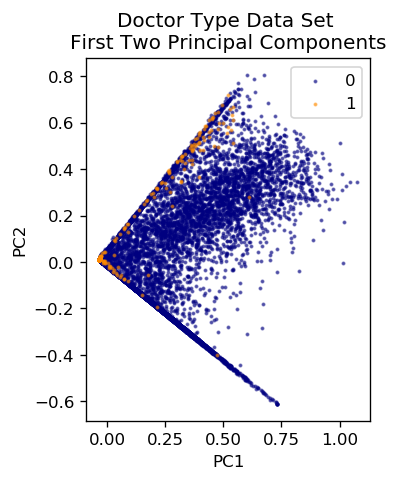

In [2]:
from sklearn.decomposition import PCA
X = train.iloc[:,4:14]
y = train.iloc[:,1]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='0', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='1', s=2, color='darkorange')
plt.legend()
plt.title('Doctor Type Data Set \nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

Let's assume the two classes data are normally distributed. With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

In [9]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train);

Now let's generate some new data and predict the label:

In [10]:
y_prob = GNB.predict_proba(X_test)
y_prob[-8:].round(2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

#### NB Performance

In [11]:
y_pred = GNB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy of Decision Trees with Gini Index classifier on test set: 0.9684668942713514
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     37088
          1       0.01      0.13      0.02       111

avg / total       0.99      0.97      0.98     37199



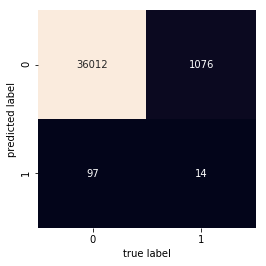

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of Naive Bayes classifier on test set: {:.16f}'.format(GNB.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

### 2) Multinomial Naive Bayes
The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

The final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.